# COMP2420/6420 - Introduction to Data Management, Analysis and Security


### Australian National University

### College of Engineering and Computer Science

Assignment 3 
============

  
|**Maximum marks**         |**100**
|--------------------------|--------
|  **Weight**              |  **15% of the total marks for the course**
|  **Submission deadline** |  **5pm, Friday, May 18**
|  **Submission mode**     |  **Electronic, using wattle**
|  **Estimated time**      |  **20 hours**
|  **Penalty**             |  **100% after the deadline**
  


# Submission

You need to submit the notebook `Assignment-3.ipynb` as part of your submission on wattle. You need to add your group and student details below. Remember your filename should be exactly as given below. Any changes to file name will mean your file can't be marked by the automarker, resulting in a zero mark.

**Note**

* For answers requiring free form written text, use the designated cells denoted by `YOUR ANSWER HERE` -- double click on the cell to write inside them.
* For all coding questions please write your code after the comment `YOUR CODE HERE`.
* After inserting your code **please remove** the following line from each code cell `raise NotImplementedError()`.
* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively.
* You will be marked on **correctness** and **readability** of your code, if your marker can't understand your code you will get zero marks. 
* We have marked some questions with a tag **hard** and **slightly hard**, so that you can plan your time accordingly
* We advise students to skip Q2.4 at first. You can always come back after finishing all other questions.
* Have marked changes in color  <font color='magenta'>magenta from last version</font>, there are few clarifications.

# Group Name : 193
### Student Id1: u5810991
### Student Id2: u6488845

In [2]:
import json
import os
import urllib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from scipy.stats import ttest_ind, ttest_rel,ttest_1samp
from sklearn.preprocessing import scale
plt.style.use('seaborn-notebook')
## inline figures
%matplotlib inline

## just to make sure few warnings are not shown
import warnings
warnings.filterwarnings("ignore")

#### If you need to put more imports please insert them below

In [10]:
## Put extra imports here if required by your code
from itertools import combinations

## Part 1 Data Analysis (15 marks)

We will use the tweets dataset from [Assignment 2](https://cs.anu.edu.au/courses/comp2420/assessment/02-assignments/ass2/comp2420/assignment-2/). The questions in part 1 are not merely about performing a t-test, you need to think carefully about the type of t-test to run and craft your hypothesis accordingly.

#### Reading the dataframe

In [4]:
df_tweets = pd.read_hdf(os.path.join('data','yt_tweets_df.h5'))
df_tweets.head(5)

,time_created,twid,user_id,rtwid,#followers,#friends,#mentions,#hashtags,lang_tweet,lang_user,place
0,2014-08-01 14:54:13,495220965932949505,888538849,495220965932949505,199,156,1,0,th,en,NaN
1,2014-08-01 15:03:33,495223314806108162,143051249,495223314806108162,88,385,1,0,th,en,NaN
2,2014-08-01 15:06:18,495224004316114944,103258302,495224004316114944,312,457,0,1,th,en,NaN
3,2014-08-01 15:11:52,495225405779881984,903364921,495224004316114944,71,461,1,1,th,en,NaN
4,2014-08-01 15:12:19,495225522066968576,555683225,495225522066968576,1533,375,1,0,th,th,NaN


#### For question Q1.1, Q1.2 and Q1.3 you need to work on the dataframe `df_tweets`

## Q 1.1
### Compare the mean for '#friends' for tweets in language 'en' (lang_tweet='en') against the overall mean value, 612. (5 marks)
Give your analysis with the help of a t-test . You will need to explicitly state your hypothesis and p-value being used. In two cells below, write your code to perform test in first cell and in second cell write your hypothesis, p-value and the result from running the tests.

In [4]:
# YOUR CODE HERE
ttest_1samp(df_tweets[df_tweets['lang_tweet'] == 'en']['#friends'], 612)

Ttest_1sampResult(statistic=2.4929597452893266, pvalue=0.012694319844190404)

We hypothesise that the mean number of friends (#friends) per tweet is 612 and will accept any result where pValue < 0.05. The result we recieved from the ttest on the sample data is ~0.01, since 0.01 < 0.05 we accept the hypothesis. (the mean number of friends per tweet is 612.)

## Q 1.2
### Compare the mean for '#friends' for tweets tagged with language English (lang_tweet='en') against the tweets tagged with language Japanese (lang_tweet='ja'). (5 marks)
Give your analysis with the help of a t-test . You will need to explicitly state your hypothesis and p-value being used. In two cells below, write your code to perform test in first cell and in second cell write your hypothesis, p-value and the result from running the tests.

In [5]:
# YOUR CODE HERE
engFrie = df_tweets[df_tweets['lang_tweet'] == 'en']['#friends']
japFrie = df_tweets[df_tweets['lang_tweet'] == 'ja']['#friends']
ttest_ind(engFrie, japFrie)

Ttest_indResult(statistic=2.8978352577844055, pvalue=0.003765385642525458)

We hypothesise that the mean number of friends (#friends) per tweet is the same independant on whether lang_tweet = en or lang_tweet = ja. We will accept any result where pValue < 0.05. The result we recieved from the ttest on the sample data is ~0.004, since 0.004 < 0.05 we accept the hypothesis. (the mean number of friends per tweet is independant on whether lang_tweet is english or japanese.)

## Q 1.3
### Compare the mean for '#followers' against '#friends 'for tweets tagged with language English (lang_tweet='en'). (5 marks)

Give your analysis with the help of a t-test . You will need to explicitly state your hypothesis and p-value being used. In two cells below, write your code to perform test in first cell and in second cell write your hypothesis, p-value and the result from running the tests.

In [5]:
# YOUR CODE HERE
ttest_rel(df_tweets[df_tweets['lang_tweet'] == 'en']['#friends'], df_tweets[df_tweets['lang_tweet'] == 'en']['#followers'])

Ttest_relResult(statistic=-6.644535539911943, pvalue=3.301997736107237e-11)

### We hypothesise that the mean number of friends (#friends) per tweet is the same as the mean number of followers per tweet. We will accept any result where pValue < 0.05. The result we recieved from the ttest on the sample data is 3.3, since 3.3 !< 0.05 we reject the hypothesis. (the mean number of friends per tweet is not same as the mean number of followers per tweet.)

## Part 2 Regression (45 marks)

We will use the data from before 2018 in the [Sean Lahman's Baseball Database](http://www.seanlahman.com/#sportsdata) to create a metric for picking baseball players using linear regression. This database contains the "complete batting and pitching statistics from 1871 to 2017, plus fielding statistics, standings, team stats, managerial records, post-season data, and more". [Documentation provided here]http://www.seanlahman.com/files/database/readme2017.txt).

We have extracted the data and derived two dataframes from it. These dataframes have historical offensive (that is, batting statistics) information about various teams and players up to and including the 2017 season.

Name of pandas DataFrame  | Name of file
:---: |  :---: |
stats |  baseball_team_stats_offensive_players.h5
playerLS | baseball_players_offensive_stats.h5

Description of **stats** DataFrame

Field| Description
:---: |  :---: |
teamID| unique ID for a baseball team
yearID| years for which we have stats for
w| number of games won out of 162 games played in a season
1B| normalized number of singles hit by team
2B| normalized number of doubles hit by team
3B| normalized number of triples hit by team
HR| normalized number of home runs hit by team
BB| normalized number of Base on Balls by team

Description of **playerLS** DataFrame

Field| Description
:---: |  :---: |
playerID| unique ID for a player
POS| position where a player plays in the team
minYear| year the player started his career
maxYear| year the player played his last game
1B| normalized number of singles hit by player
2B| normalized number of doubles hit by player
3B| normalized number of triples hit by player
HR| normalized number of home runs hit by player
BB| normalized number of Base on Balls by player
nameFirst| first name of the player
nameLast| last name of the player
salary| median salary of the player

***Note:*** You don't need to understand exactly what each of features mean! They can be seen as team/individual statistics for a baseball game.

In [7]:
stats = pd.read_hdf(os.path.join('data','baseball_team_stats_offensive_players.h5'))
stats.head(5)

,teamID,yearID,W,1B,2B,3B,HR,BB
1366,KC1,1961,61,0.008502,0.000137,0.002113,-0.007983,-0.007465
1367,LAA,1961,70,-0.008502,-0.000137,-0.002113,0.007983,0.007465
1377,BAL,1962,77,-0.007816,0.001604,-0.001117,0.002158,-0.002690
1379,CHA,1962,85,0.000165,0.004904,0.002352,-0.008813,0.012486
1380,CHN,1962,59,0.003298,-0.003391,0.002497,-0.002944,-0.005119


In [8]:
playerLS = pd.read_hdf(os.path.join('data','baseball_players_offensive_stats.h5'))
playerLS.head(5)

,playerID,POS,minYear,maxYear,1B,2B,3B,HR,BB,nameFirst,nameLast,salary
0,abreubo01,OF,1996,2014,-0.008202,0.006421,0.001002,-0.003252,0.050501,Bobby,Abreu,9000000.0
1,abreujo02,1B,2014,2017,0.010626,0.006734,-0.000287,0.015192,-0.020172,Jose,Abreu,8666000.0
2,ackledu01,2B,2011,2016,-0.015252,-0.007341,0.000254,-0.007980,-0.010525,Dustin,Ackley,2600000.0
3,adamsma01,1B,2012,2017,0.009914,0.012844,0.004034,0.000221,-0.035555,Matt,Adams,525000.0
4,adamsru01,SS,2004,2009,-0.007867,-0.001289,0.004160,-0.017533,0.002672,Russ,Adams,329500.0


## Q 2.1

### Build a simple linear regression model to predict the number of wins for each entry in `stats` dataframe. Your features should be made up of the columns pertaining to normalized singles, double, triples, HR, and BB rates. (10 marks)

To decide which of these terms to include, fit your model on data up to year 2002 and select the best performing model for data from 2003 to 2017. Use the fitted model to define a new [sabermetric](https://en.wikipedia.org/wiki/Sabermetrics) summary: which we'll call Offensive Predicted Wins (OPW). Also list the coefficients of your model

In [11]:
# YOUR CODE HERE
fitData = stats[stats['yearID'] <= 2002]
testData = stats[stats['yearID'] > 2002]

Y_test = testData.W
Y_train = fitData.W

lm = LinearRegression()
x_vars = ['1B', '2B', '3B', 'HR', 'BB']
permRes = []

for i in range(1, len(x_vars) + 1):
    for tup in combinations(x_vars, i):
        lis = list(tup)
        X_train = fitData[lis]
        X_test = testData[lis]
        lm.fit(X_train,Y_train)
        lm.predict(X_test)
        permRes.append((lis, lm.score(X_test, Y_test), lm.coef_))
        
best = float("-inf")
bestPerm = []
bestCoef = []

for ele in permRes:
    if ele[1] > best:
        bestPerm = ele[0]
        bestCoef = ele[2]
        best = ele[1]
print(bestPerm, bestCoef)

['1B', '2B', 'HR', 'BB'] [560.91264818 631.41314133 772.16022192 496.61001727]


#### Write your coeficients here in the following order 1B,2B,3B,HR,BB
1B|2B|HR|BB
:---: |  :---: | :---: |  :---: |
560|631|772|496

NOTE: 3B was not included in the model with the highest score

## Q 2.2

### Compute the OPW for each player based on the average rates in the `playerLS` DataFrame (5 marks)

Notice that players essentially have the same features as teams, so you can use your model from Q2.1 to perform a prediction. Add this column to the playerLS DataFrame. Call\Name this colum OPW.

In [12]:
# YOUR CODE HERE
playerLS['OPW'] = (547 * playerLS['1B']) + (612 * playerLS['2B']) + (766 * playerLS['HR']) + (492 * playerLS['BB'])
playerLS.head(5)

,playerID,POS,minYear,maxYear,1B,2B,3B,HR,BB,nameFirst,nameLast,salary,OPW
0,abreubo01,OF,1996,2014,-0.008202,0.006421,0.001002,-0.003252,0.050501,Bobby,Abreu,9000000.0,21.798325
1,abreujo02,1B,2014,2017,0.010626,0.006734,-0.000287,0.015192,-0.020172,Jose,Abreu,8666000.0,11.645192
2,ackledu01,2B,2011,2016,-0.015252,-0.007341,0.000254,-0.007980,-0.010525,Dustin,Ackley,2600000.0,-24.126328
3,adamsma01,1B,2012,2017,0.009914,0.012844,0.004034,0.000221,-0.035555,Matt,Adams,525000.0,-4.040900
4,adamsru01,SS,2004,2009,-0.007867,-0.001289,0.004160,-0.017533,0.002672,Russ,Adams,329500.0,-17.208019


## Q 2.3
### Plot and describe the relationship between the median salary (in millions) and the predicted number of wins for a player. (10 marks)
Player should be active in the seasons between 2010 and 2012 inclusive, and should have an experience of at least 5 years. 

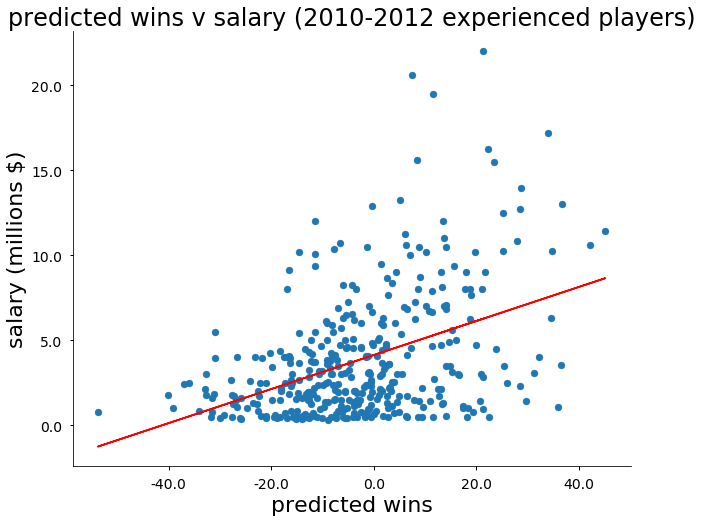

In [18]:
# YOUR CODE HERE
newFrame = playerLS[(playerLS['maxYear'] - playerLS['minYear'] >= 5) & (((playerLS['maxYear'] >= 2010) & (playerLS['minYear'] <= 2012)) | ((playerLS['minYear']<=2010)&(playerLS['maxYear']>=2012)))]
y_plot = newFrame['salary']/1000000
x_plot = newFrame['OPW']

plt.figure(figsize=(10,8))
ax = plt.subplot(111)
ax.scatter(x_plot, y_plot)

fit = np.polyfit(x_plot, y_plot, deg=1)
ax.plot(x_plot, fit[0] * x_plot + fit[1], color='red')
# http://matthiaseisen.com/pp/patterns/p0170/

ax.set_xlabel("predicted wins", fontsize=22)
ax.set_ylabel("salary (millions $)",fontsize=22)
ax.set_title("predicted wins v salary (2010-2012 experienced players)",fontsize=24)
ax.set_xticklabels(ax.get_xticks(),fontsize=14)
ax.set_yticklabels(ax.get_yticks(),fontsize=14)
sns.despine()

####  Write your description here
The plot shows that their definitely seems to be an increase in salary per predicted wins of a player (at least in relation to the players being examined).

## Q 2.4 
#### <font color='magenta'> Pick a team of 9 players such that you have a player for each of the 5 positions: C, 1B, 2B, 3B and SS, and 4 players from position OF</font>. The total budget you have for team salary is 25 million dollars.  Try to optimize for the expected/average OPW. (20 marks)  <font color='red'>hard</font>

There are many ways to do this, any reasonable optimization will be worth marks, along with the explanation of why and what are you doing. You should write your explanation in the text block provided

In [19]:
# YOUR CODE HERE
## code used enough to create functions
def nextPlayer(frame):
    playerID = frame['OPW'].idxmax()
    pos = frame.loc[playerID]
    frame = frame.drop(playerID)
    return (frame, pos)

def calcSalary(players):
    totalSalary = 0
    for player in players.keys():
        totalSalary = totalSalary + players[player]['salary']
    return totalSalary

def calcOPW(players):
    totalOPW = 0
    for player in players.keys():
        totalOPW = totalOPW + players[player]['OPW']
    return totalOPW

## setting up the data frames and first roster of players
players = {}
frames = {}

frames['CE'] = playerLS[playerLS['POS'] == 'C']
frames['1B'] = playerLS[playerLS['POS'] == '1B']
frames['2B'] = playerLS[playerLS['POS'] == '2B']
frames['3B'] = playerLS[playerLS['POS'] == '3B']
frames['SS'] = playerLS[playerLS['POS'] == 'SS']
frames['OF'] = playerLS[playerLS['POS'] == 'OF']

frames['CE'], players["CE"] = nextPlayer(frames['CE'])
frames['1B'], players["1B"] = nextPlayer(frames['1B'])
frames['2B'], players["2B"] = nextPlayer(frames['2B'])
frames['3B'], players["3B"] = nextPlayer(frames['3B'])
frames['SS'], players["SS"] = nextPlayer(frames['SS'])
frames['OF'], players["OF1"] = nextPlayer(frames['OF'])
frames['OF'], players["OF2"] = nextPlayer(frames['OF'])
frames['OF'], players["OF3"] = nextPlayer(frames['OF'])
frames['OF'], players["OF4"] = nextPlayer(frames['OF'])

totalSalary = calcSalary(players)

## while loop for when salary is greater then 25 million
currentRep = None
while totalSalary > 25000000:
    largest = float("-inf")
    for player in players.keys():
        if players[player]["salary"] > largest:
            largest = players[player]["salary"]
            currentRep = player
    
    frames[currentRep[0:2]], players[currentRep] = nextPlayer(frames[currentRep[0:2]])
    totalSalary = calcSalary(players)
    
## This entire section is just formatting the output nicely
print("totalSalary\t\t", "team mean OPW rating")  
print(str(totalSalary) + "\t\t", calcOPW(players)/9)
print("")
print("Team roster (playerID : Position)")
rowSize = 0
for player in players.keys():
    if rowSize >= 2:
        print(players[player]["playerID"] + " : " + player[0:2])
        rowSize = 0
    else:
        print(players[player]["playerID"] + " : " + player[0:2] + "\t\t", end='', flush=True)
        rowSize = rowSize + 1

totalSalary		 team mean OPW rating
24568167.0		 31.181293568675034

Team roster (playerID : Position)
avilaal01 : CE		thomafr04 : 1B		carewro01 : 2B
martied01 : 3B		blausje01 : SS		harpebr03 : OF
phamth01 : OF		troutmi01 : OF		dykstle01 : OF


#### Your explanation here

The basic idea of this solution is that it first divides players into their positions and creates a dataframe for each of those positions. It then starts with the greediest solution (largest OPW value) for each players (meaning it has the highest possible OPW mean) and removes the players it selects from the appropriate dataframe. It then goes into a loop where while the total salary is greater then 25 million it finds the player with the greatest salary removes them from the team and finds the next best player for that position based on OPW (removing them from the appropriate dataframe). it repeats this until the total salary is less then 25 million.

Issues:

Its not optimal as it doesnt take into account the possibility lower salaried players having slightly lower OPW's allowing for a better player in another position. It's also possible for 1 position to have many high valued players and become empty before the salary is reached meaning that an error would be thrown, This is extremely unlikely in a real world scenario so is not taken into account since it wouldnt be worth the effort to implement.

## Part 3 Classification (20 marks)

In this example we will use the [ credit card clients ](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) dataset.

This dataset has 24 coulmns. The last column named `DEFAULT` is the target variable which takes binary value, 1 or 0, indicating whether the client will default or not next month. Your task is **create a KNN classifier** for this dataset in Q3. You don't need to write the code to download and read the dataset as we have done this for you. You will need to work on the dataframe 'df_credit'.

Description of **df_credit** dataframe

Field| Description (type of values it takes)
:---: |  :---: |
LIMIT_BAL| Amount of the given credit
SEX| Gender (1 = male; 2 = female). 
EDUCATION|  Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
MARRIAGE|  Marital status (1 = married; 2 = single; 3 = others)
AGE| Age (year)
PAY_0| History of past payment, last month ( -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above)
PAY_2| History of past payment, 2 month back (same as PAY_0)
PAY_3| History of past payment, 3 month back (same as PAY_0)
PAY_4| History of past payment, 4 month back (same as PAY_0)
PAY_5| History of past payment, 5 month back (same as PAY_0)
PAY_6| History of past payment, 6 month back (same as PAY_0)
BILL_AMT1|  Amount of bill statement, last month
BILL_AMT2|  Amount of bill statement, 2 month back
BILL_AMT3|  Amount of bill statement, 3 month back
BILL_AMT4|  Amount of bill statement, 4 month back
BILL_AMT5|  Amount of bill statement, 5 month back
BILL_AMT6|  Amount of bill statement, 6 month back
PAY_AMT1|  Amount of previous payment, last month
PAY_AMT2|  Amount of previous payment, 2 month back
PAY_AMT3|  Amount of previous payment, 3 month back
PAY_AMT4|  Amount of previous payment, 4 month back
PAY_AMT5|  Amount of previous payment, 5 month back
PAY_AMT6|  Amount of previous payment, 6 month back
DEFAULT|  Will deafult this time (Yes = 1, No = 0)


##### You will need to create a training and test set yourself. Refer to the [lab 6](https://cs.anu.edu.au/courses/comp2420/labs/lab-6/) exercise

In [13]:
df_credit = pd.read_hdf(os.path.join('data','df_credit.h5'))
df_credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Q 3.1
#### Write a **ten-fold cross validation** to estimate the optimal value for $k$ for the data set. <font color='magenta'>You need to consider only values between 20 to 50(inclusive) for $k$.</font>(10 marks) 

##### You will need to create a training and test set yourself. Refer to the [lab 6](https://cs.anu.edu.au/courses/comp2420/labs/lab-6/) exercise

***Note*** Keep in mind optimal value of $k$ depends on $d$, where $d$ is the number of features used.

In [14]:
# YOUR CODE HERE
from sklearn.metrics import make_scorer, accuracy_score

# best k for a specific d (d = 10)
d = 10
columns = df_credit.columns
X = df_credit[columns[:d]]
Y = df_credit.DEFAULT
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 3)

k_set = [i for i in range(20,51)]
performance = []
for k in k_set:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_model, X_train, Y_train, cv=10, scoring=make_scorer(accuracy_score))
    performance.append(np.mean(score))
    
best_k = k_set[np.argmax(performance)]
print('the optimal k for d = ', d ,'is',best_k)

# raise NotImplementedError()

the optimal k for d =  10 is 21


## Q 3.2 
#### Create a boxplot showing training scores for the optimal $k$ for each $d$-dimensional subspace with $d$ ranging from one to 23. <font color='magenta'>You need to consider only values between 20 to 50 (inclusive) for $k$.</font> (5 marks)
The plot should have the scores on the y-axis and the different dimensions $d$ on the x-axis. You should increase the features incrementally -- this exercise needs you to start from one feature and increase the number of features to 23 incrementally.

In [15]:
# YOUR CODE HERE
columns = df_credit.columns
best_k = []
best_performance = []
k_set = [i for i in range(20,51)]
dimensions = [i for i in range(1,24)]
# for each dimension，find the best k and its performance
for d in dimensions:
    X = df_credit[columns[:d]]
    Y = df_credit.DEFAULT
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 3)
    
    performance = []
    mean_performance = []
    for k in k_set:
        knn_model = KNeighborsClassifier(n_neighbors=k)
        score = cross_val_score(knn_model, X_train, Y_train, cv=10, scoring=make_scorer(accuracy_score))
        mean_performance.append(np.mean(score))
        performance.append(score)
    
    # (best_k, dimension)
    best_k.append(k_set[np.argmax(mean_performance)])
    best_performance.append(performance[np.argmax(mean_performance)])
# raise NotImplementedError()

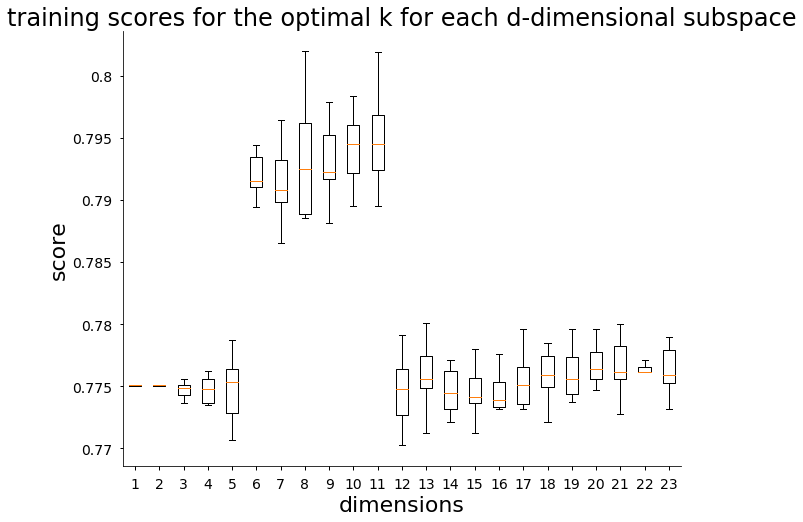

In [16]:
# show the performance for best k in each dimension
plt.figure(figsize=(10,8))
ax = plt.subplot(111)
ax.boxplot(best_performance, labels = dimensions)
ax.set_xlabel("dimensions", fontsize=22)
ax.set_ylabel("score",fontsize=22)
ax.set_title("training scores for the optimal k for each d-dimensional subspace",fontsize=24)
ax.set_xticklabels(ax.get_xticks(),fontsize=14)
ax.set_yticklabels(ax.get_yticks(),fontsize=14)
sns.despine()

## Q 3.3

#### Evaluate your performance on test set with best ($k$,$d$) pair. (5 marks)

Additionally, write a brief discussion of your conclusions to the questions and tasks in Q3.1 and Q3.2 in 100 words or less each.

In [17]:
# YOUR CODE HERE
max_score = 0
max_dimension_index = 0
# find the dimension that has best k peformance
for index in range(len(best_performance)):
    if np.mean(best_performance[index]) > max_score:
        max_score = np.mean(best_performance[index])
        max_dimension_index = index

print('best (k,d) pair:', best_k[max_dimension_index], ',', dimensions[max_dimension_index])
knn_model = KNeighborsClassifier(n_neighbors=best_k[max_dimension_index])
X = df_credit[columns[:dimensions[max_dimension_index]]]
Y = df_credit.DEFAULT
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 3)

score = cross_val_score(knn_model, X_test, Y_test, cv=10, scoring=make_scorer(accuracy_score))
print('the performance for best (k,d) pair is:', np.mean(score))
# raise NotImplementedError()

best (k,d) pair: 21 , 11
the performance for best (k,d) pair is: 0.798181754593107


YOUR ANSWER HERE

For each dimension subspace, the optimal k values are different. And the scores of them are various as well. 

It seems that the optimal k values for the dimension subspaces ranging from 6 to 11 have significantly better performance than other optimal k values, which means they do better classification jobs on the training data. However, it is still uncertain if they work well on the test set and new data (no overfit).

## Part 4 K-Means (10 marks)

We will use the standard [breast cancer data set](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html), from sklearn. We have already loaded the datset for you. $X$ contains all the features.

In [18]:
breast_cancer = datasets.load_breast_cancer()
X = scale(breast_cancer.data)

## Q 4.1 
#### Implement K-Means clustering for digits data. (10 marks) <font color='red'>slightly hard</font>

Complete the function kmeans below.
 
***Note:*** 
- You are **not allowed** to use any of the **sklearn's pre-implemented algorithms or functions**. 
- You are **not allowed** to use any pre-implemented **k-means** algorithm from **any module** .
- You **should** use the **numpy** library to do matrix operations and calculations.
- <font color='magenta'> You **should** use some smart ways for initializations.</font>

In [19]:
def kmeans(X, n_cluster, random_seed=2, n_init=100):
    '''
    Function calculates the centroids after performing k-means on the given dataset. 
    Function returns two values new calculated centers and labels for each datapoint.
    If we have n_cluster = 4 then labels from algorithm will correspond to values 0,1,2 and 3
    
    Args:
        X: np.array representing set of input data
        n_cluster: number of clusters to use for clustering
        random_seed: random seed to use for calling random function in numpy
        n_inint: max number of iterations to use for k-means
    Returns:
        centers: np.array representing the centers for n_clusters
        labels: np.array containing a label for each datapoint in X
    '''
    
    centers = np.zeros((n_cluster,X.shape[1]))
    labels = np.zeros(X.shape[0]) 
    # YOUR CODE HERE
    
    np.random.seed(random_seed)
    
    # create Centroids -> randomly pick up n_cluster points as Centroids
    centers = X.copy()
    np.random.shuffle(centers)
    centers = centers[:n_cluster]
    
    # print(labels.shape)
    
    for iteration_number in range(n_init):
        data_belong = []

        # calculate Euclidean distance
        for point in range(X.shape[0]): # for each sample
            distance = []

            for center_point in range(centers.shape[0]): # for each center point
                # use numpy.linalg.norm(a-b) to calculate distance
                distance.append(np.linalg.norm(X[point] - centers[center_point]))

            # print(distance)
            data_belong.append(np.argmin(distance))

        cluster_avg = np.zeros((n_cluster,X.shape[1]))
        cluster_indivudal_count = np.zeros(n_cluster)
        # calculate the average
        for point in range(X.shape[0]): # for each sample
            cluster_indivudal_count[data_belong[point]] += 1
            cluster_avg[data_belong[point]] += X[point]

        for center_point in range(centers.shape[0]): # for each center point
            cluster_avg[center_point] /= cluster_indivudal_count[center_point]
        
        # if the Centroids is stable, quit the loop
        if np.array_equal(labels, data_belong):
            break
        else:
            centers = cluster_avg
            labels = np.array(data_belong)
            # print(cluster_indivudal_count)
    
    # raise NotImplementedError()
    
    return centers,labels

## change the parameters of the function call to test your implementation
centers, labels = kmeans(X,n_cluster=4, random_seed=4, n_init=300)

In [20]:
## optional :You can write a code to visualize or check your algorithm here

# print('my kmeans result: centers labels', labels)

from sklearn.cluster import KMeans
sklearn_kmeans = KMeans(n_clusters=4, max_iter=300)
sklearn_kmeans.fit(X)
# print('sklearn result: centers labels', kmeans.labels_)

# sum up all the Euclidean distance -> comparison & evaluation
sklearn_dist = 0
for index in range(X.shape[0]):
    sklearn_dist += np.linalg.norm(X[index] - sklearn_kmeans.cluster_centers_[sklearn_kmeans.labels_[index]])
    
print('Euclidean dist for sklearn:', sklearn_dist)
print('----------------------------------------------------------')
for init in range(1, 11):
    my_dist = 0
    centers, labels = kmeans(X,n_cluster=4, random_seed=4, n_init=init)
    for index in range(X.shape[0]):
        my_dist += np.linalg.norm(X[index] - centers[labels[index]])
    print('Euclidean dist for my kmeans:', my_dist, '( n_init =', init, ')')
centers, labels = kmeans(X,n_cluster=4, random_seed=4, n_init=300)
print('Euclidean dist for my kmeans:', my_dist, '( n_init =', 300, ')')

Euclidean dist for sklearn: 2091.9399577080417
----------------------------------------------------------
Euclidean dist for my kmeans: 2317.5638724883547 ( n_init = 1 )
Euclidean dist for my kmeans: 2210.8241254751 ( n_init = 2 )
Euclidean dist for my kmeans: 2154.2834456727865 ( n_init = 3 )
Euclidean dist for my kmeans: 2125.3673684560204 ( n_init = 4 )
Euclidean dist for my kmeans: 2111.9272271257514 ( n_init = 5 )
Euclidean dist for my kmeans: 2106.0605905865104 ( n_init = 6 )
Euclidean dist for my kmeans: 2096.1944137161913 ( n_init = 7 )
Euclidean dist for my kmeans: 2080.9578593498914 ( n_init = 8 )
Euclidean dist for my kmeans: 2069.7873206141835 ( n_init = 9 )
Euclidean dist for my kmeans: 2067.2509749276264 ( n_init = 10 )
Euclidean dist for my kmeans: 2067.2509749276264 ( n_init = 300 )


## Part 5 Decision Trees (10 marks)

The following is a small synthetic data set about the weather conditions.  We are
going to try and use decision trees to predict whether it will rain or not on the given day.


|Temperature| Cloudy| UV Index| Humidity| Rain
|---:|--:|--:|--:|--:|
|25|No| Low| Low| No 
|29|No| Low| High| No
|26|No| Low| Medium| No
|26|No| Medium| Medium| No
|27|No| Medium| High| No
|28|No| High | High| No
|25|No| High |Low| No
|29|Yes| Low |Low| Yes
|28|No| Medium| High| Yes
|28|Yes| Medium| High| Yes
|26|No| Low |Low| Yes
|27|Yes| Low |High| Yes

**Note:**
* You can treat temperature as a continuous variable and split on a range of age values.
* Attribute selection in the tree uses information gain 

## Q 5.1
#### What is the initial entropy of Rain?  (2 marks)


Entropy(x) = - SUM {p(x) log2 p(x)}, where p(rain = No) = 7/12 and p(rain = Yes) = 5/12 (initially). Entropy(Rain) = 0.98.

## Q 5.2
#### Which attribute would the decision-tree building algorithm choose at the root of the tree?   (2 marks)

Choose one through inspection and explain your reasoning in a sentence. 

Cloudy should be chosen as the root node. This is because whether it is cloudy or not can determine 10 of the 12 samples provided. While this may create an overfitted tree it is impossible to tell with the data present and therefore cloudy should be used.

## Q 5.3
#### Calculate and specify the information gain of the attribute you chose to split on in the previous question.  (3 marks)

IG(Y|X) = Entropy(Y) - Entropy(Y|X), where Y is whether its raining and X is whether its cloudy. we know Entropy(Y) = 0.98.

And Entropy(Y|X) = -(SUM(y) SUM(x){p(Y=y|X=x) log2 p(Y=y|X=x)}) which becomes Entropy(Y|X) = 0.76.

Therefore, IG(Y|X) = 0.98 - 0.76 = 0.22.

Splitting on cloudy provides an information gain of 0.22.

## Q 5.4

#### Consider a decision tree built from an arbitrary set of data. If the output is binary, what is the maximum training set error for this dataset? Explain your answer. (Please note that this is the error on the same dataset the tree was trained on.  A new test set could have arbitrary errors.) (3 marks) <font color='red'>slightly hard</font>

The maximum error is 0.5 (50%). This is because in a worst case scenario a split will always occur with the result being trained towards the higher probability. The worst possible split is one where a split is being made independant values (have no influence on the outcome) eg. 

|1|2|R
|---:|--:|--:|
|T|T|Yes
|T|T|Yes
|T|T|Yes
|T|T|No
|T|T|No
|T|T|No
|T|T|Yes

NOTE: R is the result column

In this case both available variable have no influence on the outcome however the tree will always train to the best value (in this case yes occurs 1 more time then no for the samples). If another 1 = T, 2 = T, R = No, entry was added to the table then the decision tree would have to make a 50/50 split where no matter what half the results are incorrect.